In [2]:
import pandas as pd
import seaborn as sns

# Importando base de datos

In [3]:
datos = pd.read_csv('credit_card.csv')
datos.head(10)
#LIMIT_BAL : Limite de la persona, el valor esta en dolares americanos
#CHECKING_ACCOUNT: Si la persona tiene una cuenta corriente
#BILL_AMT: Valor de la factura
#PAY_AMT: El valor pago
#DEFAULT: Si la persona es morosa o no

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,Yes,2.University,Single,23,114.4180,114.4180,0
6,42154,Yes,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,Yes,1.High School,Single,34,2946.8657,694.3366,0
8,78286,Yes,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,Yes,2.University,Single,41,1957.1500,301.1000,0


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


# Traduciendo nombre de columnas y variables

In [5]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

Cambiamos nombre de columnas

In [6]:
dic_columnas = {
    'LIMIT_BAL':'limite',
    'CHECKING_ACCOUNT': 'cuenta_corriente',
    'EDUCATION':'escolaridad',
    'MARRIAGE':'estado_civil',
    'AGE':'edad',
    'BILL_AMT': 'valor_factura',
    'PAY_AMT':'valor_pago',
    'DEFAULT':'moroso'
}

In [7]:
tarjetas = datos.rename( columns=dic_columnas)
tarjetas

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
...,...,...,...,...,...,...,...,...
1495,54198,Yes,3.Graduate School,Single,27,295.0780,0.0000,1
1496,45165,No,2.University,Married,55,23637.8555,1144.1800,0
1497,78286,No,3.Graduate School,Single,34,962.9178,962.9178,0
1498,6022,No,2.University,Married,44,864.7592,864.7592,0


Cambiamos nombre de variables de la columna cuenta_corriente

In [8]:
tarjetas.cuenta_corriente.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
dic_cuenta = {
    'Yes': 'SI',
    'No': 'NO'
}

In [10]:
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta)

Cambiamos nombre de variables de la columna escolaridad

In [11]:
tarjetas.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [12]:
dic_escolaridad = {
    '2.University':'2.Universidad',
    '3.Graduate School':'3.Pos-Grado',
    '1.High School':'1.Escuela'
}

In [13]:
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)

Cambiamos nombre de viariables de la columna estado_civil

In [14]:
tarjetas.estado_civil.unique()

array(['Married', 'Single'], dtype=object)

In [15]:
dic_estado_civil={
    'Married':'Casado/a',
    'Single':'Soltero/a'
}

In [16]:
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_estado_civil)

In [17]:
tarjetas

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,SI,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,SI,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,SI,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,SI,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,NO,3.Pos-Grado,Soltero/a,29,124060.1253,16560.5000,0
...,...,...,...,...,...,...,...,...
1495,54198,SI,3.Pos-Grado,Soltero/a,27,295.0780,0.0000,1
1496,45165,NO,2.Universidad,Casado/a,55,23637.8555,1144.1800,0
1497,78286,NO,3.Pos-Grado,Soltero/a,34,962.9178,962.9178,0
1498,6022,NO,2.Universidad,Casado/a,44,864.7592,864.7592,0


# Visualizacion con seaborn

Analisis I

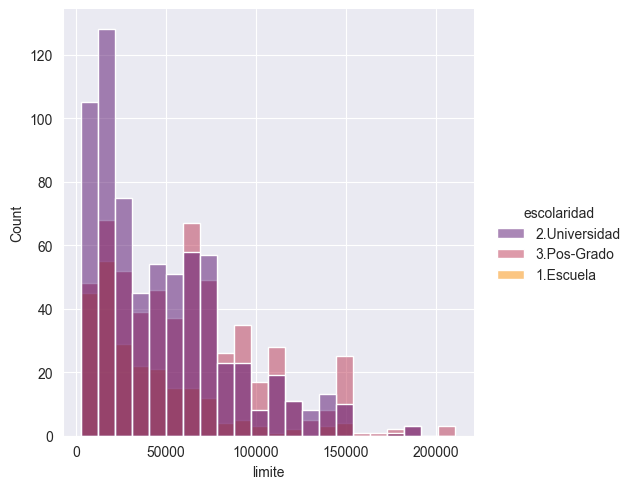

In [24]:
sns.displot(data = tarjetas, x='limite', hue='escolaridad', palette = 'inferno');

Analisis II

In [19]:
# cuanto utilizo de la tarjeta de credito, teniendo en cuenta el limite
tarjetas['iu'] = (tarjetas['valor_factura']/tarjetas['limite'])

In [20]:
tarjetas.head(10)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,SI,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,SI,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,SI,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,SI,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,NO,3.Pos-Grado,Soltero/a,29,124060.1253,16560.5000,0,0.824046
5,30110,SI,2.Universidad,Soltero/a,23,114.4180,114.4180,0,0.003800
6,42154,SI,1.Escuela,Casado/a,28,4244.3056,1002.3619,0,0.100686
7,60220,SI,1.Escuela,Soltero/a,34,2946.8657,694.3366,0,0.048935
8,78286,SI,3.Pos-Grado,Soltero/a,51,6524.8370,6524.8370,0,0.083346
9,189693,SI,2.Universidad,Soltero/a,41,1957.1500,301.1000,0,0.010317


In [21]:
sns.set_style('darkgrid')

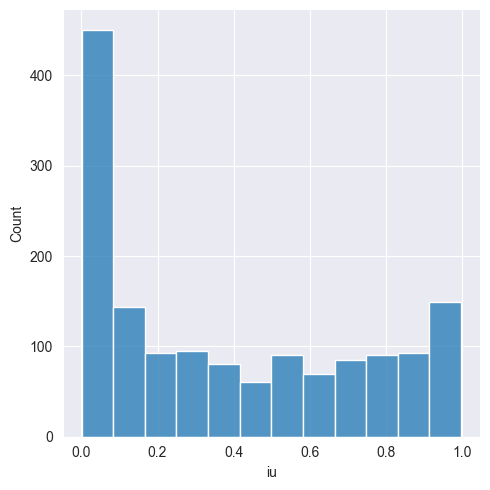

In [22]:
sns.displot(data =tarjetas, x ='iu');

Hay un publico significativo que usa poco del limite que tiene disponible

# Analizando variables categoricas

In [25]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,SI,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,SI,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,SI,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,SI,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,NO,3.Pos-Grado,Soltero/a,29,124060.1253,16560.5000,0,0.824046


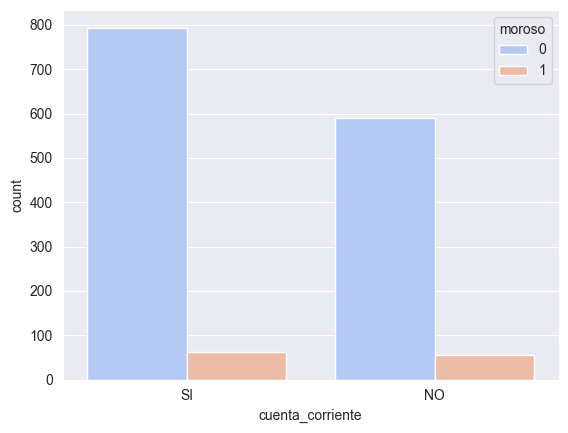

In [31]:
sns.countplot(x='cuenta_corriente', data = tarjetas, hue ='moroso', palette='coolwarm');

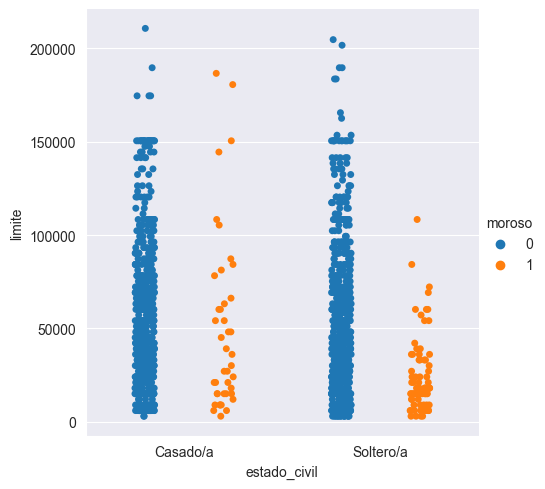

In [35]:
sns.catplot(x='estado_civil',y='limite', data =tarjetas, hue='moroso',dodge=True);

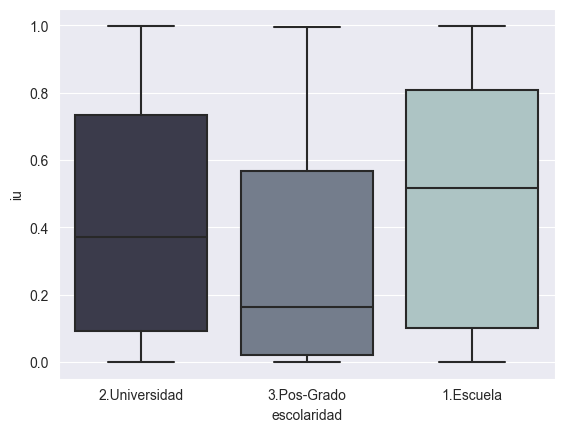

In [39]:
sns.boxplot(x='escolaridad', y ='iu', data=tarjetas, palette='bone');

In [40]:
tarjetas.edad.unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72],
      dtype=int64)

In [41]:
bins =[20,30,40,50,100] # son los cortes
rangos = ['20-30','30-40','40-50','50+']
tarjetas['rango_edad']=pd.cut(tarjetas['edad'],bins,labels=rangos)
tarjetas

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,SI,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,SI,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,SI,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,SI,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,NO,3.Pos-Grado,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30
...,...,...,...,...,...,...,...,...,...,...
1495,54198,SI,3.Pos-Grado,Soltero/a,27,295.0780,0.0000,1,0.005444,20-30
1496,45165,NO,2.Universidad,Casado/a,55,23637.8555,1144.1800,0,0.523367,50+
1497,78286,NO,3.Pos-Grado,Soltero/a,34,962.9178,962.9178,0,0.012300,30-40
1498,6022,NO,2.Universidad,Casado/a,44,864.7592,864.7592,0,0.143600,40-50


<Axes: xlabel='rango_edad', ylabel='limite'>

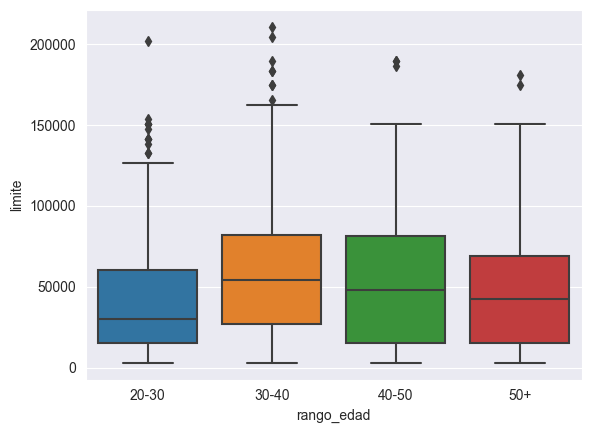

In [42]:
sns.boxplot(x='rango_edad', y='limite', data=tarjetas)